# 1. Overview

## 1.1 Import Dataset

In [1]:
import pandas as pd
dataset = pd.read_table("crx.data",header=None,delimiter = ',')
dataset = dataset.rename(columns=lambda s: 'C'+str(s+1))
dataset

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## 1.2 Explore the Data

In [2]:
# Inspecting the df, we find that the some columns has hidden missing values indicated by '?'
# Replace all instances of '?' with NaN
import numpy as np
dataset=dataset.replace('?',np.NaN)

# 95% data for modeling; 5% data for predictions
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (656, 16)
Unseen Data For Predictions: (34, 16)


## 1.3 Profile Report

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='CRX Dataset Report', html={'style':{'full_width':True}})
profile.to_file(output_file="crx_dataset_report.html")
profile.to_notebook_iframe()

# 2. Data Preprocessing

In [4]:
from pycaret.classification import *
clf = setup(data,
            target='C16',
            session_id = 123,
            silent = True,
            train_size = 0.75,
            numeric_imputation = 'mean',
            categorical_imputation = 'constant',
            numeric_features = ['C2'],
            categorical_features = ['C11'],
            ignore_features = ['C4'],
            high_cardinality_features = ['C14'],
            handle_unknown_categorical = True,
            unknown_categorical_method = 'least_frequent',
            normalize = False,
            transformation = False,
            combine_rare_levels = True,
            remove_multicollinearity = True,
            pca = False,
            ignore_low_variance = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"+: 0, -: 1"
3,Original Data,"(656, 16)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [5]:
# Preprocessed dataset
clf[0].to_csv("crx_preprocessed.csv")
clf[0]

,C2,C3,C8,C14,C15,C1_a,C1_not_available,C5_not_available,C5_p,C6_aa,...,C11_3.0,C11_4.0,C11_5.0,C11_6.0,C11_7.0,C11_9.0,C11_others_infrequent,C12_f,C13_p,C13_s
0,21.92,0.500,0.125,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16.33,0.210,0.125,32.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,39.17,1.710,0.125,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.58,5.000,5.000,126.0,3065.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.83,0.000,0.665,30.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,20.00,7.000,0.500,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
652,16.92,0.335,0.290,32.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
653,37.33,6.500,4.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,22.92,1.250,0.250,33.0,809.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Model Training

## 3.1 Compare Models 

In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.861900,0.917600,0.878700,0.877200,0.876000,0.719800
1,CatBoost Classifier,0.859900,0.928700,0.860100,0.888700,0.871600,0.716900
2,Logistic Regression,0.859800,0.918100,0.845500,0.898900,0.869400,0.718100
3,Extreme Gradient Boosting,0.855800,0.929100,0.863800,0.879600,0.869300,0.708000
4,Ridge Classifier,0.853800,0.000000,0.805300,0.923900,0.858500,0.708600
5,Random Forest Classifier,0.853800,0.918600,0.845600,0.889500,0.865000,0.705400
6,Linear Discriminant Analysis,0.849800,0.918600,0.801700,0.919700,0.854500,0.700600
7,Light Gradient Boosting Machine,0.849700,0.922900,0.871200,0.863200,0.865000,0.695000
8,Ada Boost Classifier,0.847600,0.915700,0.852800,0.873400,0.861100,0.692000
9,Gradient Boosting Classifier,0.831300,0.916500,0.837800,0.862400,0.846200,0.658800


## 3.2 Create Model

In [7]:
m = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8800,0.9253,0.8571,0.9231,0.8889,0.7588
1,0.7800,0.8409,0.8929,0.7576,0.8197,0.5424
2,0.8571,0.9150,0.8889,0.8571,0.8727,0.7101
3,0.8980,0.9731,0.9259,0.8929,0.9091,0.7929
4,0.8571,0.9352,0.8889,0.8571,0.8727,0.7101
5,0.8163,0.8721,0.7778,0.8750,0.8235,0.6334
6,0.8367,0.8956,0.9259,0.8065,0.8621,0.6644
7,0.8571,0.9259,0.8148,0.9167,0.8627,0.7149
8,0.9184,0.9428,0.9259,0.9259,0.9259,0.8350
9,0.9184,0.9503,0.8889,0.9600,0.9231,0.8364


## 3.3 Tune Model

In [8]:
tuned = tune_model('et', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8800,0.9383,0.8571,0.9231,0.8889,0.7588
1,0.8200,0.8539,0.8929,0.8065,0.8475,0.6293
2,0.8367,0.8939,0.8889,0.8276,0.8571,0.6672
3,0.8980,0.9697,0.8889,0.9231,0.9057,0.7946
4,0.8776,0.9444,0.8519,0.9200,0.8846,0.7546
5,0.7959,0.8838,0.7407,0.8696,0.8000,0.5944
6,0.8776,0.9310,0.9259,0.8621,0.8929,0.7504
7,0.8571,0.9428,0.8148,0.9167,0.8627,0.7149
8,0.8980,0.9798,0.8889,0.9231,0.9057,0.7946
9,0.9184,0.9680,0.8889,0.9600,0.9231,0.8364


# 4. Model Ensembling

In [9]:
ensembled = ensemble_model(tuned, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8600,0.9318,0.8571,0.8889,0.8727,0.7173
1,0.8200,0.8571,0.8571,0.8276,0.8421,0.6330
2,0.8163,0.8939,0.8148,0.8462,0.8302,0.6303
3,0.9184,0.9764,0.9259,0.9259,0.9259,0.8350
4,0.8776,0.9377,0.8519,0.9200,0.8846,0.7546
5,0.8163,0.8889,0.7778,0.8750,0.8235,0.6334
6,0.8776,0.9276,0.9259,0.8621,0.8929,0.7504
7,0.8571,0.9461,0.8519,0.8846,0.8679,0.7125
8,0.8980,0.9630,0.8889,0.9231,0.9057,0.7946
9,0.9388,0.9731,0.9259,0.9615,0.9434,0.8768


# 5. Model Analysis

## 5.1 AUC Plot

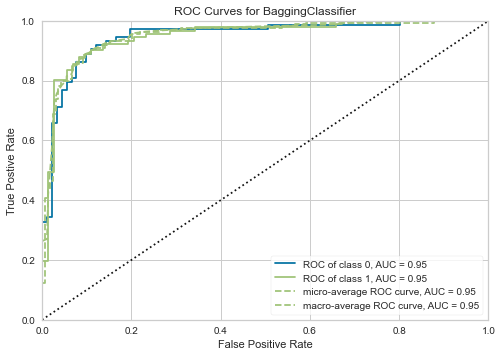

In [10]:
plot_model(ensembled, plot = 'auc')

## 5.2 Precision-Recall Curve

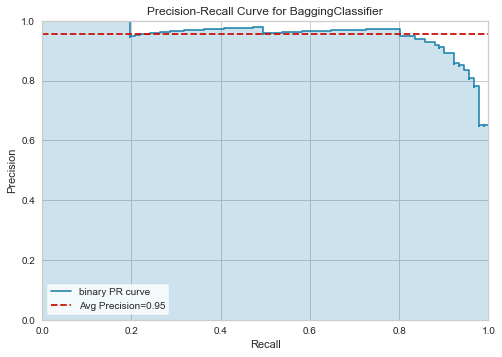

In [11]:
plot_model(ensembled, plot = 'pr')

## 5.3 Confusion Matrix

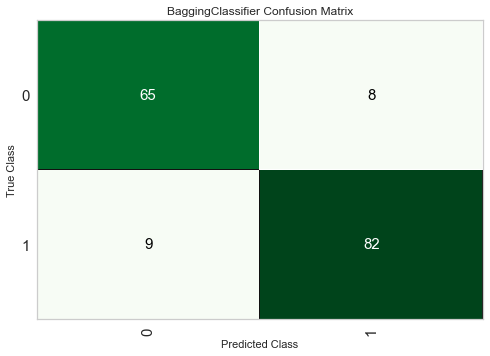

In [12]:
plot_model(ensembled, plot = 'confusion_matrix')

# 6. Model Deployment

## 6.1 Predict Model

In [13]:
predictions_holdout = predict_model(ensembled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.8963,0.9487,0.9011,0.9111,0.9061,0.7904


## 6.2 Finalize Model

In [14]:
model = finalize_model(ensembled)
model

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=100,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=2,
                                                      min_samples_split=9,
                                                      min_weight_fraction_leaf=0.0,
                                

In [15]:
unseen_predictions = predict_model(model, data=data_unseen)
unseen_predictions.to_csv("crx_predicted.csv")
unseen_predictions

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,Label,Score
0,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+,1,0.5229
1,a,41.00,2.040,y,p,q,h,0.125,t,t,23,t,g,00455,1236,+,0,0.2366
2,b,41.50,1.540,u,g,i,bb,3.500,f,f,0,f,g,00216,0,+,1,0.9181
3,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-,1,0.5832
4,a,24.75,12.500,u,g,aa,v,1.500,t,t,12,t,g,00120,567,+,0,0.1970
5,a,47.42,8.000,u,g,e,bb,6.500,t,t,6,f,g,00375,51100,+,0,0.1533
6,b,25.00,12.500,u,g,aa,v,3.000,t,f,0,t,s,00020,0,+,1,0.5482
7,a,41.33,1.000,u,g,i,bb,2.250,t,f,0,t,g,00000,300,+,0,0.4885
8,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+,0,0.1125
9,b,60.08,14.500,u,g,ff,ff,18.000,t,t,15,t,g,00000,1000,+,0,0.2161


## 6.3 Save Model

In [16]:
save_model(model, 'model')

Transformation Pipeline and Model Succesfully Saved


## 6.4 Save Experiment

In [17]:
save_experiment('experiment_05032020')

Experiment Succesfully Saved


## 6.5 Loading saved Experiment

In [18]:
saved_experiment = load_experiment('experiment_05032020')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,Extra Trees Classifier
8,Extra Trees Classifier Score Grid
9,Tuned ExtraTreesClassifier
